# Length-Gauge Split-Step Treatment of Optically-Driven Free-Electron Modulation

DESCRIPTION HERE  

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../includes')
import pulse_functions as pulses
import quantum_split_step as qss
import physical_constants_SI as pcSI
import physical_constants_atomic as pca

Ek = 10e3*pca.evcon #Kinetic energy
t_fwhm = 500e-15*pca.tcon

ve = np.sqrt(2*Ek) #velocity of electron
z_fwhm = t_fwhm*ve
z = np.linspace(-2*z_fwhm, 2*z_fwhm, 10000)

psi_in = pulses.cos2pulse(z, z_fwhm, 0, 0)['A']

t_start = -1e-12*pca.tcon
t_end = 1e-12*pca.tcon
Nt = 3000
t = np.linspace(t_start, t_end, Nt)

def V(t, z):
    
    #User parameters
    lambda0 = 1500e-9*pca.lcon
    sig_z = 10e-6*pca.lcon
    sig_t = 200e-15*pca.tcon
    theta = 80*np.pi/180
    phi0 = np.pi/2
    E0 = 1e8*pca.efieldcon

    #Derived parameters
    omega0 = 2*np.pi*pca.c/lambda0
    k0 = 2*np.pi/lambda0
    kz = k0*np.cos(theta)
    
    #Potential calculation
    V_out = 2*E0*np.tan(theta)*np.sin(kz*z + phi0)*np.cos(omega0*t)*np.exp(-z**2/sig_z**2)*np.exp(-1*t**2/sig_t**2)/k0
    V0 = 2*E0*np.tan(theta)*np.sin(phi0)*np.cos(omega0*t)*np.exp(-1*t**2/sig_t**2)/k0
    V_out = V_out*(z<0) + V0*(z>=0)

    
    return V_out

psi_out = qss.quantum_split_step(psi_in, V, t, z, v0=ve)
psi_out2 = qss.quantum_split_step2(psi_in, V, t, z, v0=ve)

display(psi_out.shape)

(3000, 10000)

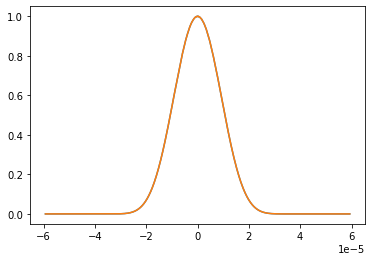

In [47]:
plt.plot(z/pca.lcon, np.abs(psi_out[-1, :].squeeze())**2)
plt.plot(z/pca.lcon, np.abs(psi_out2[-1, :].squeeze())**2)

#plt.plot(z[0:-1]/pca.lcon, np.diff(np.unwrap(np.angle((psi_out[-1, :].squeeze())))))
#plt.plot(z[0:-1]/pca.lcon, np.diff(np.unwrap(np.angle((psi_out2[-1, :].squeeze())))))

#plt.plot(np.abs(np.fft.fft(psi_out[-10, :].squeeze())), 'bo-')
#plt.xlim(350, 450)
#plt.xlim(-5e-6, 5e-6)
#plt.ylim(0.5, 1)
#plt.imshow(np.abs(psi_out)**2)
#plt.xlim(4500, 5500)

In [48]:
V_out = np.zeros((Nt, z.size))

for co in range(0, Nt):
    V_out[co, :] = V(t[co], z + t[co]*ve)

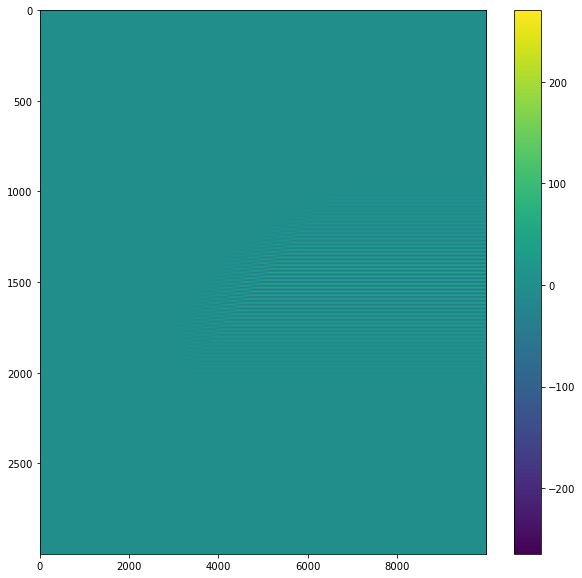

In [49]:
    
fig = plt.figure()
plt.imshow(V_out/pca.evcon, aspect='auto')
plt.colorbar()
#plt.ylim(0, 1500)
fig.set_size_inches(10, 10)

In [37]:
1e-12*pca.tcon*ve/pca.lcon

5.931011771312019e-05

In [38]:
np.tan(80*np.pi/180)

5.671281819617707